O que é Bagging?

**Bagging**

Bagging (Bootstrap Aggregating) é uma técnica de ensemble que reduz a variância de um modelo treinando várias versões dele em diferentes subconjuntos do mesmo conjunto de dados.
Cada subconjunto é criado por bootstrap (amostragem com reposição).
Depois, todos os modelos fazem previsões e o resultado final é uma agregação dessas previsições (voto ou média).
O objetivo é tornar o modelo mais estável e evitar overfitting.

**No meu entendimento**: é como perguntar para várias pessoas diferentes e juntar as respostas para ter uma resposta mais precisa e confiável. É uma técnica simples, mas muito poderosa para melhorar o desempenho dos modelos de Machine Learning.

In [ ]:
Código do Bagging

In [1]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 1. Carregar dados

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 2. Função de bootstrap

def bootstrap_sample(X, y):
    n = len(X)
    indices = np.random.choice(n, size=n, replace=True)
    return X.iloc[indices], y.iloc[indices]


# 3. Bagging manual

n_modelos = 10
modelos = []

for i in range(n_modelos):
    X_boot, y_boot = bootstrap_sample(X_train, y_train)

    modelo = DecisionTreeClassifier()
    modelo.fit(X_boot, y_boot)
    modelos.append(modelo)


# 4. Agregação das previsões

def bagging_predict(modelos, X):
    preds = np.array([modelo.predict(X) for modelo in modelos])
    # Voto majoritário
    final_pred = np.apply_along_axis(
        lambda x: np.bincount(x).argmax(),
        axis=0,
        arr=preds
    )
    return final_pred


# 5. Avaliação do Bagging

y_pred = bagging_predict(modelos, X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Acurácia do Bagging: {acc:.4f}")

Acurácia do Bagging: 1.0000


Gráficos

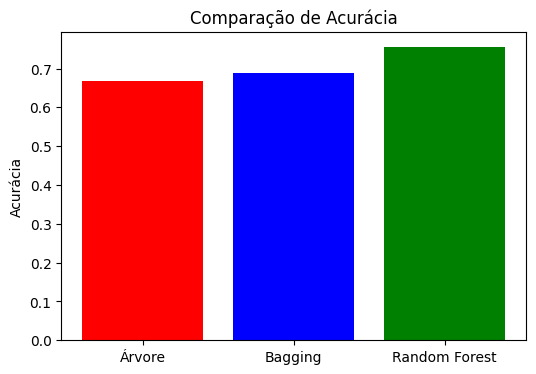

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Carregar dados

data = load_iris()
X = data.data[:, :2]  # usar apenas 2 features para plot
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Função bootstrap

def bootstrap_sample(X, y):
    idx = np.random.choice(len(X), len(X), replace=True)
    return X[idx], y[idx]


# Treinar Bagging manual

n_modelos = 10
modelos_bagging = []

for i in range(n_modelos):
    X_boot, y_boot = bootstrap_sample(X_train, y_train)
    modelo = DecisionTreeClassifier()
    modelo.fit(X_boot, y_boot)
    modelos_bagging.append(modelo)

def bagging_predict(modelos, X):
    preds = np.array([m.predict(X) for m in modelos])
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)

# Modelos individuais

tree = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)


# Acurácias

acc_tree = accuracy_score(y_test, tree.predict(X_test))
acc_bag = accuracy_score(y_test, bagging_predict(modelos_bagging, X_test))
acc_rf = accuracy_score(y_test, rf.predict(X_test))


# Gráfico de barras da acurácia

plt.figure(figsize=(6,4))
plt.bar(["Árvore", "Bagging", "Random Forest"],
        [acc_tree, acc_bag, acc_rf],
        color=["red", "blue", "green"])
plt.title("Comparação de Acurácia")
plt.ylabel("Acurácia")
plt.show()

Gráfico de Decisão

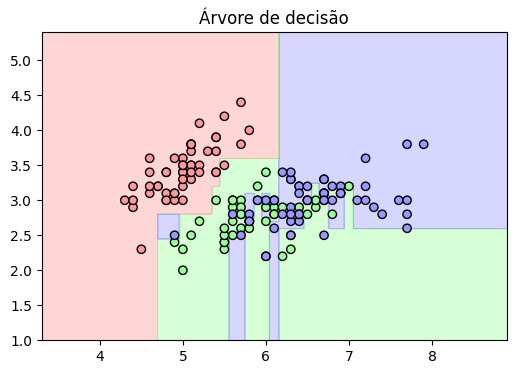

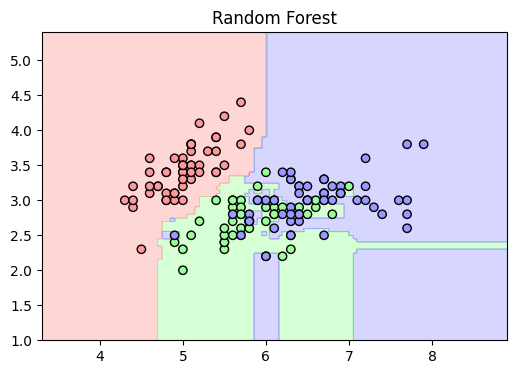

In [3]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    cmap = ListedColormap(['#ff9999','#99ff99','#9999ff'])

    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolor="k")
    plt.title(title)
    plt.show()

plot_decision_boundary(tree, X, y, "Árvore de decisão")
plot_decision_boundary(rf, X, y, "Random Forest")

BAGGING PARA REGRESSÃO

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Dados de regressão

X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Bagging Regressão Manual

n_models = 20
models_reg = []

for i in range(n_models):
    Xb, yb = bootstrap_sample(X_train, y_train)
    m = DecisionTreeRegressor()
    m.fit(Xb, yb)
    models_reg.append(m)

def bagging_predict_reg(models, X):
    preds = np.array([m.predict(X) for m in models])
    return preds.mean(axis=0)

y_pred_reg = bagging_predict_reg(models_reg, X_test)

mse_bag_reg = mean_squared_error(y_test, y_pred_reg)

# Árvore única
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
mse_tree_reg = mean_squared_error(y_test, tree_reg.predict(X_test))

# Random Forest
rf_reg = RandomForestClassifier()

print("MSE Árvore:", mse_tree_reg)
print("MSE Bagging:", mse_bag_reg)

MSE Árvore: 0.5338240160733688
MSE Bagging: 0.26488627739315396


Gráfico da comparação do erro

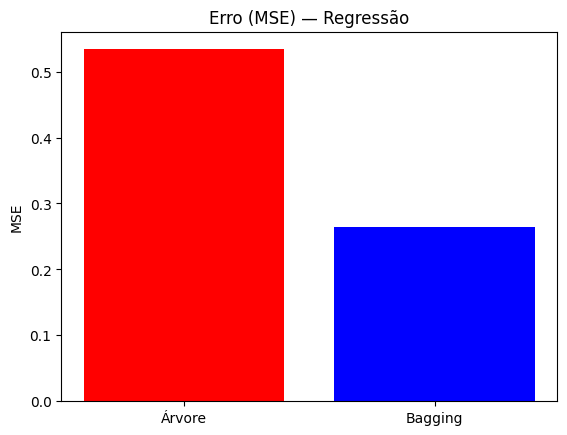

In [5]:
plt.bar(["Árvore", "Bagging"], [mse_tree_reg, mse_bag_reg], color=["red","blue"])
plt.title("Erro (MSE) — Regressão")
plt.ylabel("MSE")
plt.show()

  **Resumo**

• O Bagging reduz a variância do modelo ao combinar vários modelos gerados a partir de amostras bootstrap.

• Em classificação, tanto o Bagging quanto o Random Forest aumentam a acurácia em relação à árvore única.

• O Random Forest normalmente supera o Bagging manual, pois adiciona aleatoriedade na seleção de variáveis.

• Em regressão, o Bagging também reduz o erro (MSE), tornando o modelo mais estável.
• Os gráficos de fronteiras de decisão mostram que a árvore individual é bem instável, enquanto o Bagging suaviza as fronteiras.

**Conclusão:**

Bagging é uma excelente técnica para estabilizar modelos instáveis (como árvores de decisão), enquanto Random Forest é uma versão ainda mais robusta.
